In [1]:
import import_ipynb
from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from aqi_epa_pm25.ipynb
PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_2BBA    float64
TANGARA_25CE    float64
TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_14D6    float64
TANGARA_1EE6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_2BBA,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,,,
2023-10-01 22:58:00-05:00,4.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2023-10-01 22:58:30-05:00,3.0,NaN,3.0,7.0,4.0,1.0,7.0,7.0,4.0,3.0,4.0,5.0,6.0,NaN,0.0
2023-10-01 22:59:00-05:00,4.0,NaN,4.0,9.0,3.0,1.0,7.0,5.0,4.0,4.0,3.0,3.0,5.0,NaN,0.0
2023-10-01 22:59:30-05:00,3.0,NaN,NaN,9.0,3.0,2.0,7.0,4.0,4.0,4.0,3.0,3.0,4.0,NaN,0.0
2023-10-01 23:00:00-05:00,4.0,NaN,3.0,8.0,3.0,1.0,7.0,5.0,4.0,4.0,4.0,4.0,2.0,NaN,0.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_2BBA,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,5915.000000,1087.0,5691.000000,5327.000000,2629.000000,5214.000000,5534.000000,5659.000000,5286.000000,5743.000000,5458.000000,5601.000000,5730.000000,4309.000000,5907.0
mean,7.542012,0.0,9.124231,9.982354,9.113731,10.123514,9.505240,8.483831,8.825199,10.477973,10.462624,7.039279,7.948517,9.068461,0.0
std,3.363662,0.0,4.612262,6.635320,4.356934,6.404943,4.623339,4.378909,3.724893,4.240115,4.649623,3.942021,4.675578,4.587051,0.0
min,2.000000,0.0,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.0
25%,5.000000,0.0,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,6.000000,7.000000,7.000000,4.000000,4.000000,5.000000,0.0
50%,7.000000,0.0,9.000000,8.000000,9.000000,8.000000,9.000000,7.000000,8.000000,10.000000,10.000000,6.000000,7.000000,8.000000,0.0
75%,10.000000,0.0,12.000000,13.000000,12.000000,13.000000,13.000000,11.000000,11.000000,13.000000,14.000000,10.000000,11.000000,11.000000,0.0
max,17.000000,0.0,22.000000,30.000000,21.000000,30.000000,23.000000,22.000000,19.000000,22.000000,27.000000,19.000000,21.000000,22.000000,0.0


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_2BBA,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,,,
2023-10-01 22:58:00-05:00,17.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2023-10-01 22:58:30-05:00,13.0,NaN,13.0,30.0,17.0,5.0,30.0,30.0,17.0,13.0,17.0,21.0,25.0,NaN,0.0
2023-10-01 22:59:00-05:00,17.0,NaN,17.0,38.0,13.0,5.0,30.0,21.0,17.0,17.0,13.0,13.0,21.0,NaN,0.0
2023-10-01 22:59:30-05:00,13.0,NaN,NaN,38.0,13.0,9.0,30.0,17.0,17.0,17.0,13.0,13.0,17.0,NaN,0.0
2023-10-01 23:00:00-05:00,17.0,NaN,13.0,34.0,13.0,5.0,30.0,21.0,17.0,17.0,17.0,17.0,9.0,NaN,0.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_2BBA,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,5915.000000,1087.0,5691.000000,5327.000000,2629.000000,5214.000000,5534.000000,5659.000000,5286.000000,5743.000000,5458.000000,5601.000000,5730.000000,4309.000000,5907.0
mean,31.441420,0.0,36.771042,38.207809,37.036135,38.944764,38.139682,34.385757,36.327090,41.952638,41.539575,29.216926,32.268935,36.462752,0.0
std,13.219592,0.0,16.447321,20.288341,15.714001,19.902149,16.342236,15.677460,13.863311,14.319689,15.533869,15.275713,17.056786,15.924564,0.0
min,9.000000,0.0,9.000000,9.000000,5.000000,5.000000,5.000000,9.000000,9.000000,13.000000,9.000000,0.000000,0.000000,9.000000,0.0
25%,21.000000,0.0,21.000000,21.000000,25.000000,21.000000,25.000000,21.000000,25.000000,30.000000,30.000000,17.000000,17.000000,21.000000,0.0
50%,30.000000,0.0,38.000000,34.000000,38.000000,34.000000,38.000000,30.000000,34.000000,42.000000,42.000000,25.000000,30.000000,34.000000,0.0
75%,42.000000,0.0,50.000000,53.000000,50.000000,53.000000,53.000000,46.000000,46.000000,53.000000,55.000000,42.000000,46.000000,46.000000,0.0
max,62.000000,0.0,72.000000,89.000000,70.000000,89.000000,74.000000,72.000000,66.000000,72.000000,83.000000,66.000000,70.000000,72.000000,0.0


## Histograms

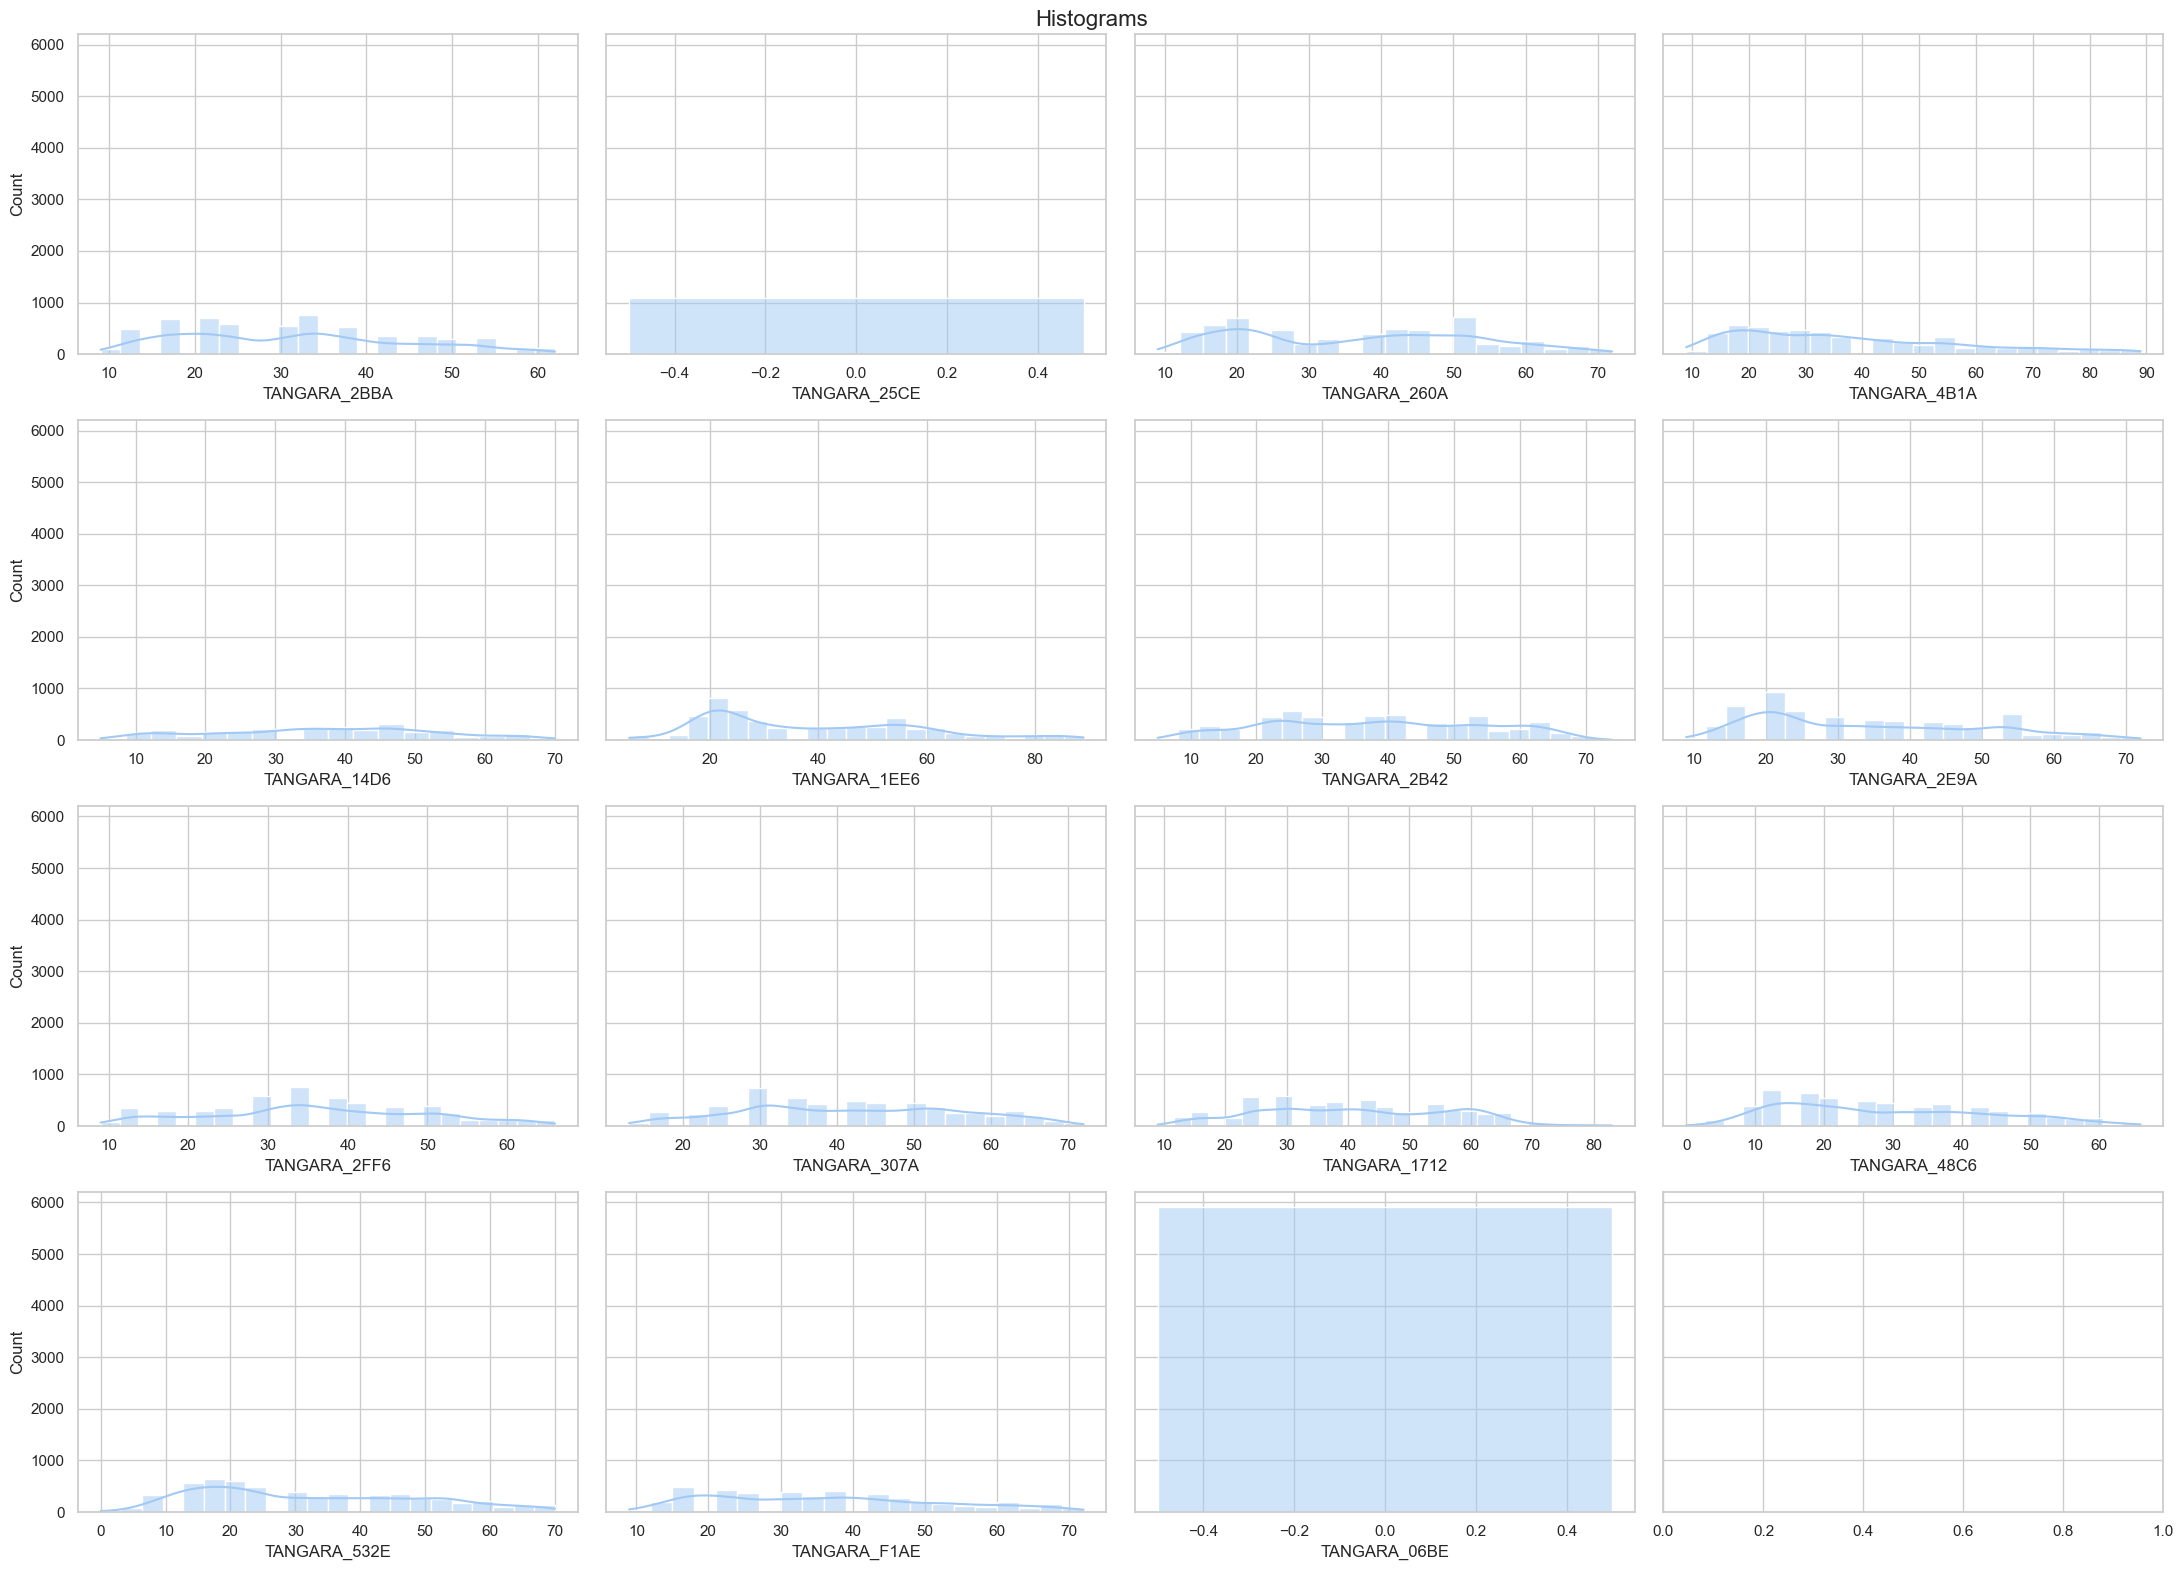

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

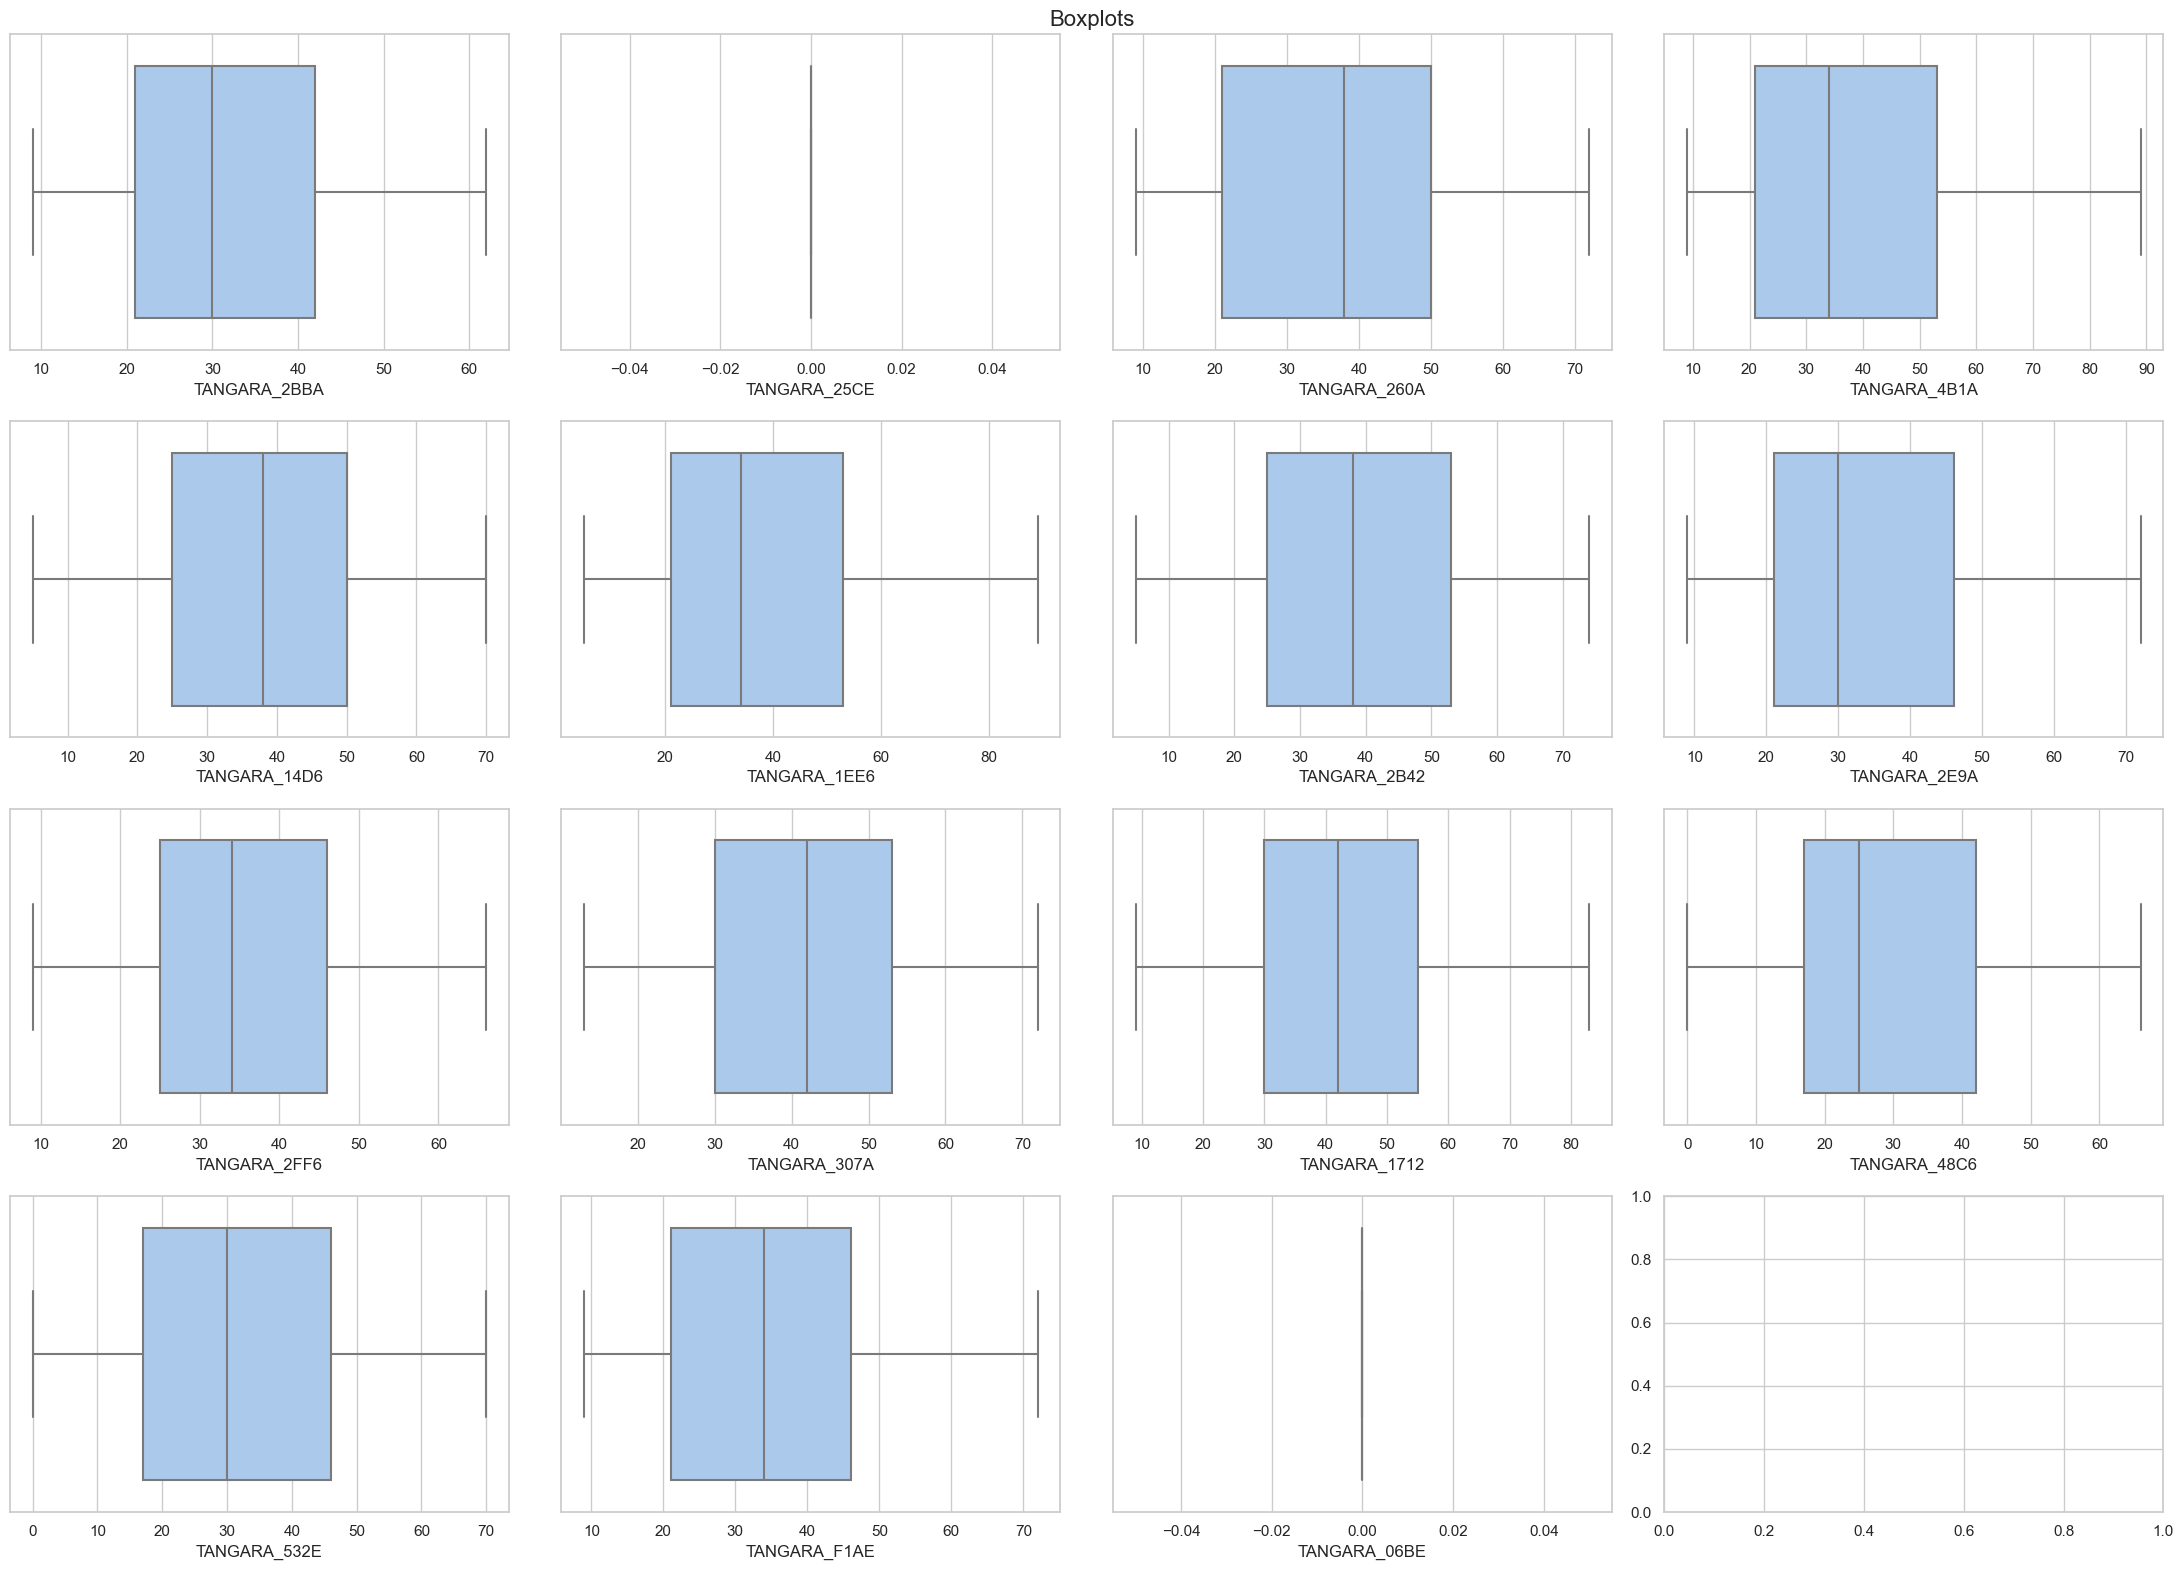

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

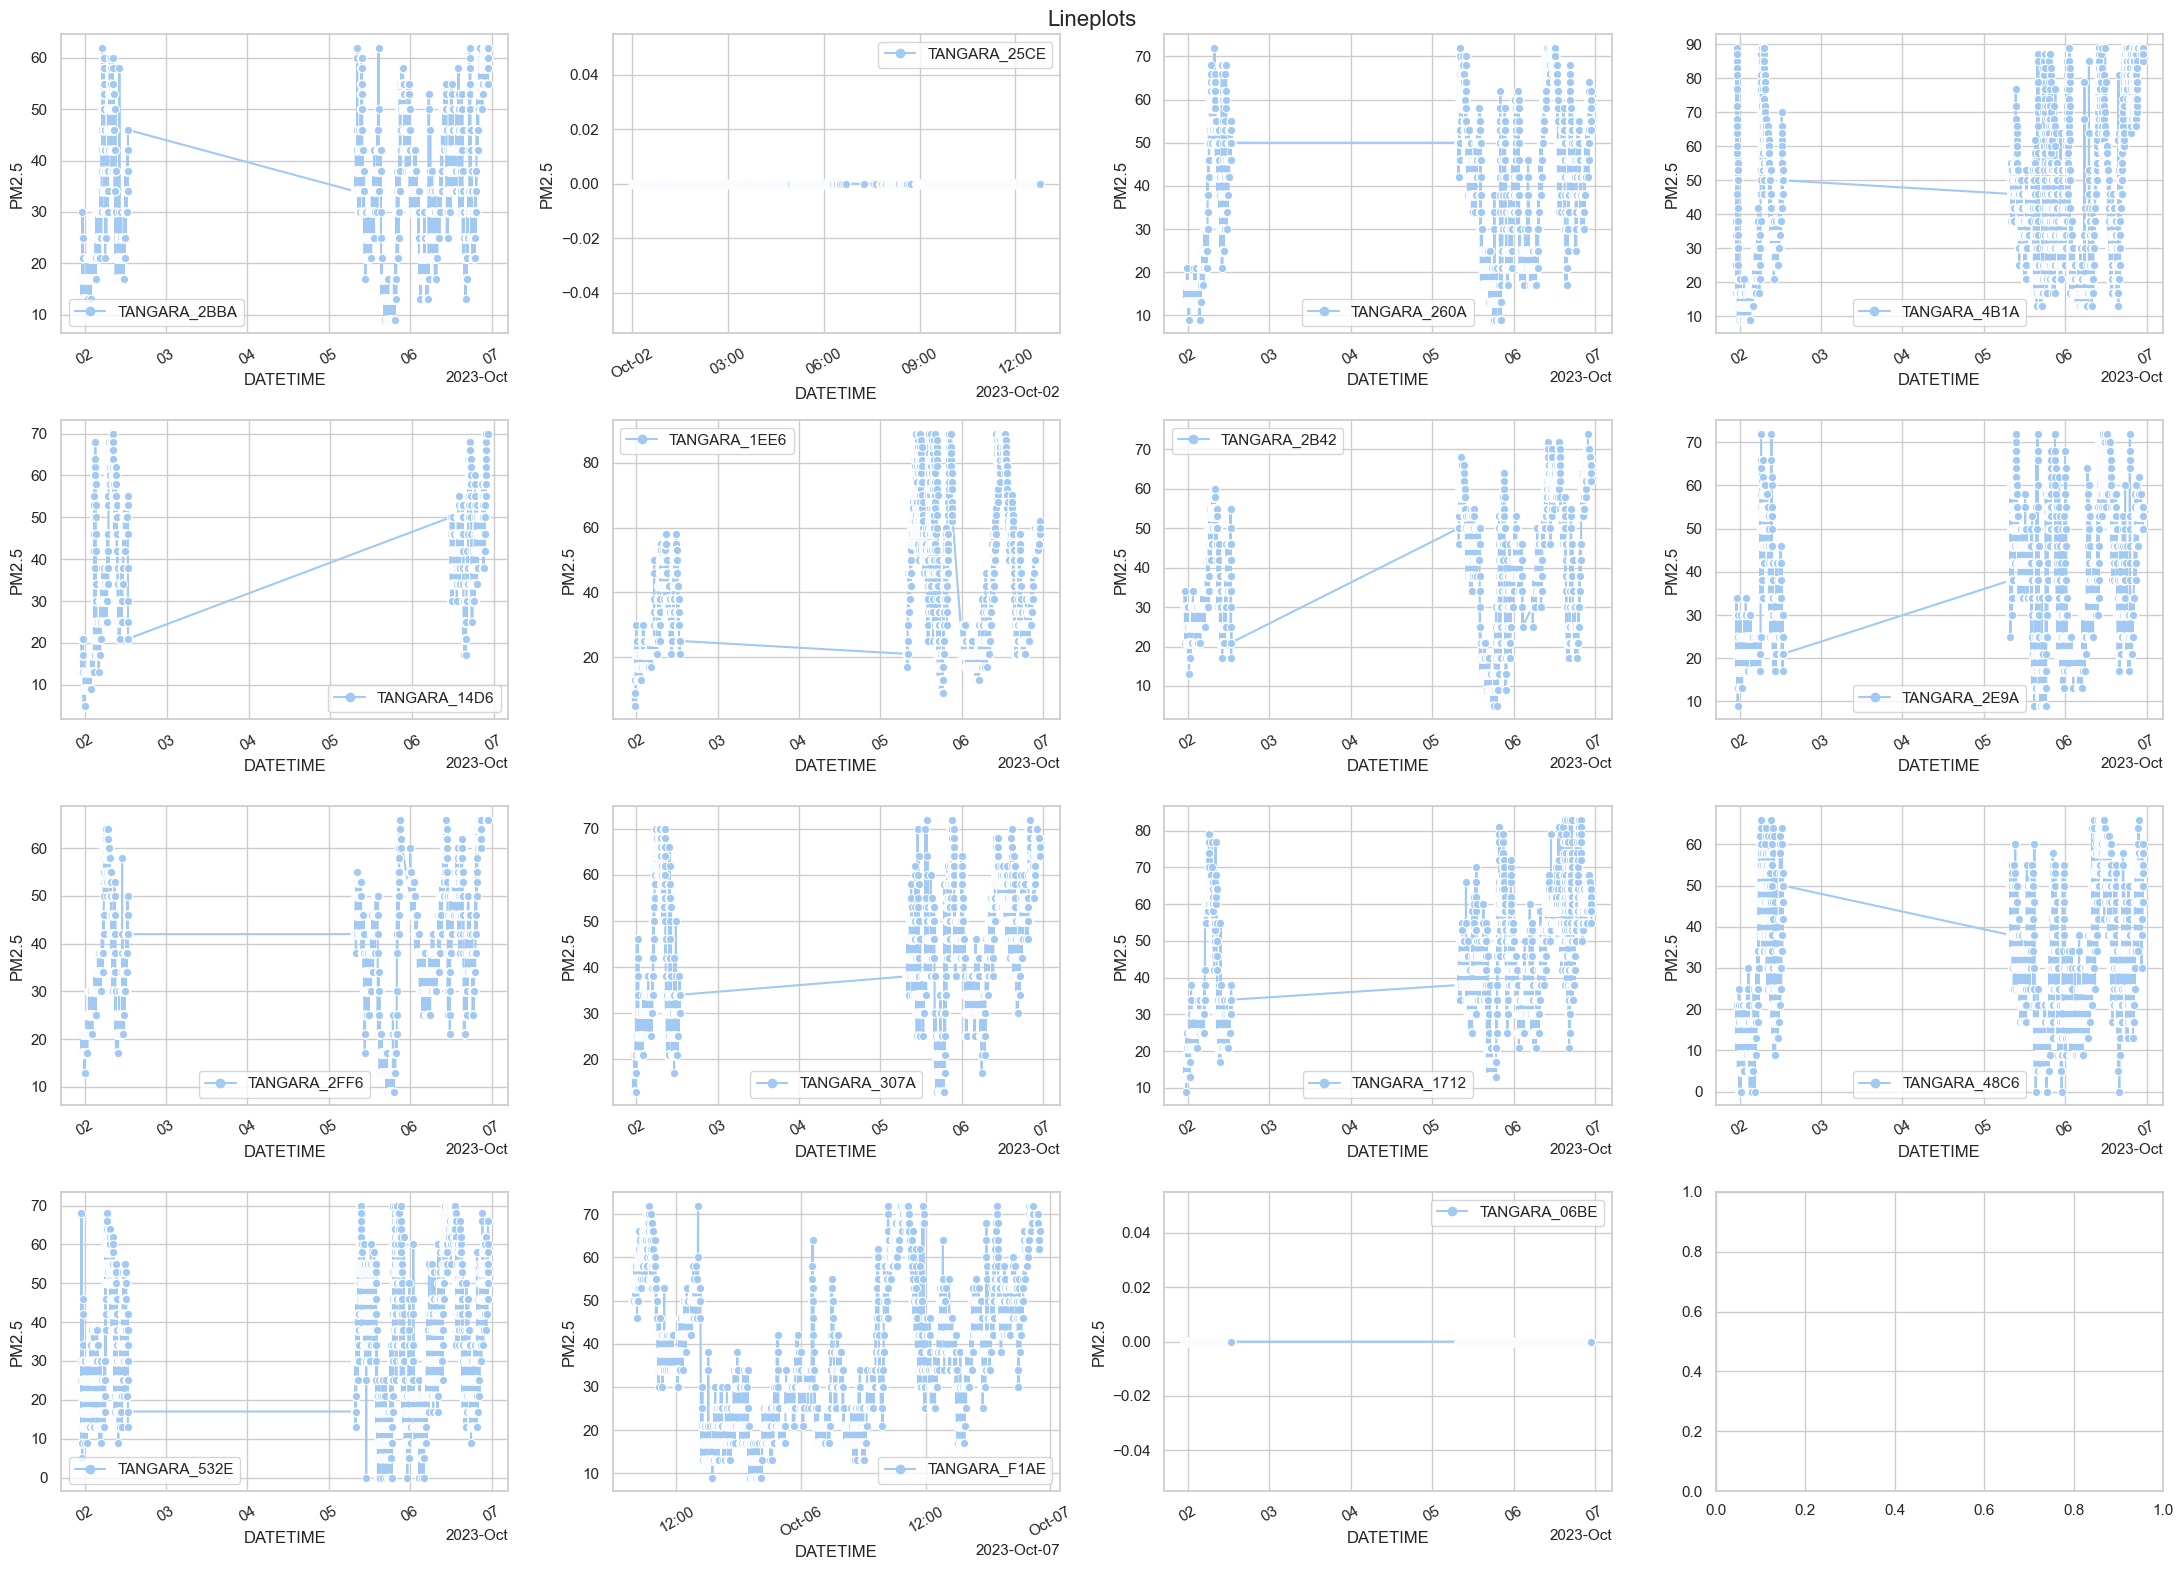

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')